# **Konwolucyjne Sieci Neuronowe (CNN) i przetwarzanie obrazów**

Konwolucyjne sieci neuronowe (ang. Convolutional Neural Networks, CNN) to głębokie sieci neuronowe szczególnie skuteczne w analizie obrazów. Wynika to z wykorzystania operacji konwolucji, która pozwala na hierarchiczna ekstrakcję istotnych cech z danych wejściowych. Rozmiar danych wejściowych jest redukowany wraz z głębokością sieci bez istotnej utraty informacji.

## **Architektura**

Zwykle CNN składają się z kilku warstw:

- Warstwy konwolucyjnej – odpowiada za ekstrakcję cech poprzez operację splotu między wejściowym obrazem a zestawem filtrów (jąder konwolucyjnych). Filtry te wykrywają lokalne wzorce, takie jak krawędzie, tekstury czy bardziej złożone struktury.

- Warstwy aktywacji – wprowadza nieliniowość w modelu, umożliwiając modelowi reprezentację skomplikowanych zależności (najczęściej ReLu).

- Warstwy agregacji (Pooling Layer) – odpowiadają za redukcję wymiarowości danych oraz zwiększają odporność na szum przez filtrowanie (np. uśrednianie, average pooling).

- Warstwy w pełni połączone – odpowiedzialne za klasyfikację, predykcje.

**CNN są podstawą dzisiejszych modeli wizji komputerowej, detekcji obiektów. segmentacji obrazów i klasyfikacji obrazów.**



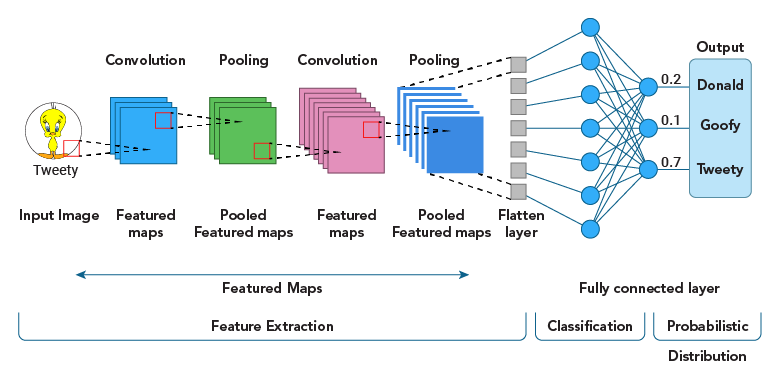


(źródło: https://www.softwebsolutions.com/resources/difference-between-cnn-rnn-ann.html)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

## Przetwarzanie obrazów, filtry i operacja splotu.

W tej części jest gotowy do wykonania kod, który implementuje operacje splotu w keras dla różnych filtrów.

In [ ]:
# Generowanie losowych danych
np.random.seed(37)
image = np.random.rand(1, 10, 10, 1)  # TASK: Jaki maja kształt dane - jaka jest ich interpetacja dla sieci neuronowych? Wpisac intepretacje adekwatnie to wymiarow macierzy w tym nawiasie: (,,,)

In [ ]:
imgplot = plt.imshow(image[0,:,:,0], cmap='gray')
plt.show()

In [ ]:
# Definicja prostego modelu ze splotem
model = Sequential([
    Conv2D(filters=1, kernel_size=(3, 3), padding='same', activation=None, input_shape=(10, 10, 1))
])

In [ ]:
# Prosty filtr na wykrywanie krawędzi
kernel = np.array([[ -1, -1, -1],
                   [ -1,  8, -1],
                   [ -1, -1, -1]])
kernel = kernel.reshape((3, 3, 1, 1))  # Dopasuj rozmiar danych miedzy filtrem i splotem

In [ ]:
# Dodaj manualnie wagi konwolucji
model.layers[0].set_weights([kernel, np.array([0])])

In [ ]:
# Sprawdzenie czy wagi filtra sa dobrze zapisane
model.layers[0].get_weights()

In [ ]:
# Operacja splotu
convolved_image = model.predict(image)
convolved_image = convolved_image[0, :, :, 0]  # usuwanie niepotrzebnych wymiarów

In [ ]:
# Pokazanie wyników splotu
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image[0, :, :, 0], cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(convolved_image, cmap='gray')
ax[1].set_title("Convolved Image")
ax[1].axis("off")

plt.show()

In [ ]:
# Inny rodzaj funkcji jądra - rozmycie gaussowskie
gaussian_kernel = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]]) / 16
gaussian_kernel = gaussian_kernel.reshape((3, 3, 1, 1))
model.layers[0].set_weights([gaussian_kernel, np.array([0])])
blurred_image = model.predict(image)[0, :, :, 0]


In [ ]:
# Pokazanie wyników splotu
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image[0, :, :, 0], cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(blurred_image, cmap='gray')
ax[1].set_title("Convolved Image")
ax[1].axis("off")

plt.show()

**TASK**
1. Zastosować i porównać dodatkowe filtry na powyższym wygenerowanym obrazku (obiekt `image`). Należy zdefiniować odpowiedni filtr w keras i zastosować go do wygenerowanego obrazka, podobnie jak w powyższych przykładach. Filtry do zastosowania:
- uśredniający, jądro filtra:
```
   [[0.11111111, 0.11111111, 0.11111111],
   [0.11111111, 0.11111111, 0.11111111],
   [0.11111111, 0.11111111, 0.11111111]]
   ```
- ostrzący, jądro filtra: `[[ 0, -1,  0], [-1,  5, -1], [ 0, -1,  0]]`
- wymyślony przez Was filtr, np. szkieletyzacja itp. (zdefiniować dowolnie wymyślony przez Was filtr).

2. Zastosować powyższe operacje dla wybranego przez siebie obrazka. Opisać wpływ filtrów na obraz wraz z przykładową wizualizacją filtra, obrazkiem przed i po zastosowaniu filtra. Wyjaśnić jak mają się filtry to do tego co robią warstwy konwolucyjne w sieci CNN. **TIP** Jeżeli nie umiecie znaleźć odpowiedniego obrazu, można skorzystać z obrazów z zbioru danych fashion-mnist z następnej części notebooka. **NOTE** Jeżeli użyjecie obrazu o 3 kanałach, należy odpowiednio zmienić kształt filtrów w keras.

3. Wykonać operację splotu używając biblioteki numpy poprzez kroki:
 - wygeneruj losowy obraz o rozmiarze 27x27 (czarno-biały - 1 kanał)
 - zdefiniuj filtr uśredniający o wymiarze 3x3 - rozmiar jądra (kernel) = 3
 - wykonaj operacje paddingu (dodanie pikseli na brzegach obrazu) obrazka, która jest wymagana do operacji splotu. (wielkość paddingu to `int(rozmiar_jadra/2))`. Można skorzystać z metody `np.pad`
 - wykonaj operacje splotu:
    - zdefiniowanie macierzy zer reprezentującej nowy obraz
    - zastosowanie filtra uśredniającego sąsiednie piksele dla kazdego piksela wejściowego obrazu (operacja splotu dla kazdego piksela obrazu)
 - pokazanie obrazu wejściowego przed i po operacji splotu razem z pokazaniem jego rozmiaru
 - pokazanie filtra

In [ ]:
# miejsce na kod

## Klasyfikacja obrazów z użyciem CNN i zbioru danych fashion MNIST (https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=pl)

Poniżej znajduje się działający kod budujący CNN dla zbioru danych fashion-MNIST. Należy wykonać kod a poźniej przejść do następnego zadania.

**TIP** Podczas początkowej pracy z modelem można trenować sieć na mniejszej ilości epok w celu sprawdzenia czy model się uczy i skrócenia czasu debugowania.

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
# Ładowanie danych fashion mnist
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

**TASK** Opisać dlaczego normalizacja daych jest ważna dla obrazów i CNN?
- ...

In [ ]:
# Normalizacja danych
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
train_images[0].shape

In [ ]:
# Przykładowy obraz ze zbioru danych
imgplot = plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

In [ ]:
# Reshape danych do warstwy konwolucyjnej (batch_size, height, width, channels)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [ ]:
train_images[0].shape


#### **NOTE** Dlaczego tak zmieniamy powyżej rozmiar danych dla sieci CNN:
- (28, 28) to rozmiar obrazka
- train_images.shape[0] to rozmiar batcha - jako że zbiór jest mały możemy uczyc CNN w jednym batchu
- 1 to liczba kanałow RGB
- **QQ:** Dla dużych danych jaki jest problem z uczeniem modelu na jednym batchu? (można się odnieść do artykułu o różnych optimizerach który Wam wysłałem na Teamsach)

In [ ]:
# Prosty model CNN
model = models.Sequential([
    # Warstw konwolucyjna - dodaje filtry (3,3) by wychwycić 'wzorce'
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    # Pooling layer mapuje cechy i redukuje wymiarowość
    layers.MaxPooling2D((2,2)),
    # Druga warstwa konwolucyjna - wychwytuje cechy 'wyższego rzędu' w obrazie
    layers.Conv2D(64, (3,3), activation='sigmoid'),
    layers.MaxPooling2D((2,2)),
    # Trzecia warstwa konwolucyjna
    layers.Conv2D(64, (3,3), activation='sigmoid'),

    # Warstwa klasyfikująca
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Podsumowanie modelu zwróci architekture oraz łączną ilość parametrów (~93 tysiące jeżeli architektura sieci nie zostanie zmieniona)
model.summary()

In [ ]:
history = model.fit(train_images, train_labels, epochs=2, validation_data=(test_images, test_labels))

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

In [ ]:
# Wizualizacja historii treningu
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Przykład predykcji
prediction = model.predict(test_images[:1])
prediction

In [ ]:
print(f"Predykcja: {prediction.argmax()}, Rzeczywista klasa: {test_labels[0]}")

**TASK** Policzenie metryk: **precision, recall i confusion matrix** dla powyższego modelu na danych treningowych i testowych.

**MINI-TASK**  Optymalizacja parametrów sieci konwolucyjnej w celu wyższej dokładności klasyfikacji dla zbioru fashion MNIST. Możliwe obszary do poprawy:
- dodanie BatchNormalization Layer
- zmiana Optimizer'a
- zmiana funkcji aktywacji w warstwach konwolucyjnych sieci
- Optymalizacja architektury CNN
- Zmiana wartości PDP w warstwie Dropout

CEL: Celem zadania jest pokazanie poprawy dokładności modelu do powyżej 75 procent dokładności na zbiorze testowym oraz opisanie **z czego** ta poprawa wynika.

**TASK (\$)** Zaimpementowac sieć FeedForward do klasyfikacji zbioru danych fashion-mnist i porownać dokładność klasyfikacji dla tego zbioru między CNN a siecią  FeedForward.

- **TASK** Wizualizacja decyzji CNN - wizualizacja filtrow.
Wewnątrz warstw konwolucyjnych znajdują się filtry których wagi trenujecie podczas treningu sieci. W tym zadaniu chciałbym, żebyście zobaczyli jakie wartości mają wytrenowane przez Was filtry. Kroki:
1. Pobranie filtrow z warst konwolucyjnych sieci `layer.get_weights()`
2. Normalizacja wartości filtrów do skali [0,1] (`filters = (filters - f_min) / (f_max - f_min)`)
3. Wybranie pierwszych 3 filtrow i wizualizacja filtrow osobno dla kanałów (jezeli wiecej niz 1 kanał). **TIP** Wybrać odpowiednią cześć filtra jako obraz ([:,:,:,n]) oraz skorzystać biblioteki matplotlib do pokazania obrazu (metoda `imshow`).

- **TASK** Augmentacja danych i sprawdzenie dokładności predykcji CNN dla zaugmentowanych danych. (Augmentacja danych - proces generowania nowych danych z użyciem innych danych rzeczywistych, np. rotacja obrazu). Wykonać dowolny proces augmentacji danych i sprawdzić jak model radzi sobie z predykcją dla zaugmentowanych danych. Można korzystać z:
  - Moduł https://www.tensorflow.org/api_docs/python/tf/image
  
  **Opis** W sprawozdaniu opisać jak augmentacja danych wpłyneła na dokładność modelu.

## **TASK** Zastosować CNN do klasyfikacji dla zbioru danych cifar10 (https://www.cs.toronto.edu/~kriz/cifar.html).

Podobnie jak dla zbioru danych fashion-MNIST, należy zdefiniować i wytrenować konwolucyjną sieć neuronową dla zbioru danych cifar10.

- Obrazy w zbiorze cifar10 mają 3 kanały, podczas implementacji sieci CNN należy:
  - znormalizować dane
  - uwzględnić ilość kanałow w warstwie wejściowej sieci

($) Po sukcesie z zbiorem cifar10, spróbować zastosować CNN do zbioru cifar100.

**TIP** Żeby przyspieszyć uczenie można zmienić środowisko na środowisku z GPU.

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()